 ![OpenAI Logo](https://saudigazette.com.sa/uploads/images/2020/06/18/1584889.png)


<h1 align="center"> Saudi Pro League Transfers </h1>

### Importing Libararies and reading data

In [37]:
import pandas as pd
import numpy as np

# For data cleaning
import re

# For visualization
import matplotlib.pyplot as plt 

# For correlation
import seaborn as sns

In [2]:
# Reading file 

spl_transfers = pd.read_csv('saudi-pro-league-transfers.csv')

print(spl_transfers)

          club_name         player_name   age            position  \
0      Al-Hilal SFC         Khaled Aziz  18.0  Defensive Midfield   
1      Al-Hilal SFC       Sami Al-Jaber  27.0      Centre-Forward   
2      Al-Hilal SFC  Fahad Al-Ghesheyan  26.0        Right Winger   
3      Al-Hilal SFC   Saleh Al-Salloumi  37.0          Goalkeeper   
4      Al-Hilal SFC       Elijah Litana  29.0         Centre-Back   
...             ...                 ...   ...                 ...   
7853    Al-Raed SFC        Mamadou Loum  27.0  Defensive Midfield   
7854  Al-Ettifaq FC    Rayan Al-Bloushi  23.0      Centre-Forward   
7855  Al-Taawoun FC              Flávio  28.0    Central Midfield   
7856  Al-Taawoun FC       Muath Faquihi  22.0           Left-Back   
7857     Khaleej FC  Abdalellah Hawsawi   NaN            Midfield   

     club_involved_name                      fee transfer_movement  \
0               Unknown                        ?                in   
1                Wolves        

In [3]:
#  displaying the fitst 10 row 

spl_transfers.head(10)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
5,Ittihad Club,Marzouq Al-Otaibi,24.0,Centre-Forward,Al-Shabab,€2.00m,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia
6,Ittihad Club,Khalid Massad,28.0,Attacking Midfield,Al-Ahli,free transfer,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia
7,Ittihad Club,Ivan Malimon,21.0,Centre-Forward,Edessaikos,free transfer,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia
8,Ittihad Club,Manaf Abushgeer,20.0,Left Midfield,Ittihad C. U23,-,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia
9,Ittihad Club,Darci,31.0,Left Winger,Antalyaspor,?,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia


In [4]:
spl_transfers.tail(10)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country
7848,Al-Hilal SFC,Matheus Pereira,28.0,Attacking Midfield,Cruzeiro,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7849,Al-Hilal SFC,Muath Faquihi,22.0,Left-Back,Al-Taawoun,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7850,Ittihad Club,Abdulaziz Al-Bishi,30.0,Right Winger,Damac FC,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7851,Al-Nassr FC,Khalil Al-Absi,23.0,Left Winger,Al-Hazem,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7852,Damac FC,Abdulaziz Al-Bishi,30.0,Right Winger,Ittihad Club,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7853,Al-Raed SFC,Mamadou Loum,27.0,Defensive Midfield,FC Porto,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23.0,Centre-Forward,Al-Safa,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7855,Al-Taawoun FC,Flávio,28.0,Central Midfield,Trabzonspor,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7856,Al-Taawoun FC,Muath Faquihi,22.0,Left-Back,Al-Hilal,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7857,Khaleej FC,Abdalellah Hawsawi,NaN,Midfield,Ittihad C. U23,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia


In [5]:
spl_transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7755 non-null   float64
 3   position            7858 non-null   object 
 4   club_involved_name  7858 non-null   object 
 5   fee                 7844 non-null   object 
 6   transfer_movement   7858 non-null   object 
 7   transfer_period     7858 non-null   object 
 8   league_name         7858 non-null   object 
 9   season              7858 non-null   object 
 10  country             7858 non-null   object 
dtypes: float64(1), object(10)
memory usage: 675.4+ KB


In [6]:
spl_transfers.columns #Displying columns names

Index(['club_name', 'player_name', 'age', 'position', 'club_involved_name',
       'fee', 'transfer_movement', 'transfer_period', 'league_name', 'season',
       'country'],
      dtype='object')

In [7]:
# Looking for clubs that had been repeated in the df
club_counts = spl_transfers['club_name'].value_counts()

print(club_counts)

Ittihad Club       640
Al-Ahli SFC        596
Al-Nassr FC        567
Al-Shabab FC       542
Al-Hilal SFC       541
Al-Raed SFC        497
Al-Ettifaq FC      472
Al-Taawoun FC      431
Al-Faisaly FC      428
Al-Fateh SC        377
Al-Wehda FC        363
Al-Qadsiah FC      286
Al-Fayha FC        239
Najran SC          224
Al-Hazem SC        210
Al-Batin FC        202
Damac FC           193
Khaleej FC         178
Abha Club          143
Hajer Club         124
Al-Tai FC          118
Ohod Club          115
Al-Adalah FC        85
Al-Shoalah FC       70
Al-Orobah FC        63
Al-Ain FC           37
Al-Riyadh SC        36
Al-Ansar            24
Al-Okhdood Club     23
Al-Nahdah FC        22
Al-Watani           12
Name: club_name, dtype: int64


According to the data, the most frequent teams in transfers in the Saudi League Pro are Al-Ittihad Al-Ahly and Al-Nasr in first places, then followed by Al-Shabab, Al-Hilal and the rest of the other teams.

### Cleaning 'fee' column

In [8]:
# 'Fee' column cleaning 

# By looking at the column data at the top, you can see that it contains a variety of data types

# Thus, we will use the unique function to find out the type of data, by creating new column 'Unique Fees'

unique_fees = pd.DataFrame(spl_transfers['fee'].unique(), columns=['Unique Fees'])

print(unique_fees)

                 Unique Fees
0                          ?
1              loan transfer
2                          -
3                     €2.00m
4              free transfer
..                       ...
402  End of loanAug 31, 2023
403                  €14.00m
404                   €4.65m
405                   €1.37m
406  End of loanDec 31, 2023

[407 rows x 1 columns]


In [9]:
def clean_fee(fee):
    if pd.isnull(fee) or fee == '?' or fee == '-' or fee.startswith('End of loan'):
        return None
# Check if the fee value is null or contains '?' or '-' or starts with 'End of loan'. If any of these conditions are met, return None to represent a missing value.
   
    fee = str(fee)
    fee = fee.replace('€', '').replace('m', 'e6').replace('K', 'e3')
    
# Convert the fee value to a string and remove the '€' symbol. Replace 'm' with 'e6' to represent million and 'K' with 'e3' to represent thousand.    
    if re.match(r'^\d+\.?\d*e\d+$', fee):
        return float(fee)
    else:
        return None

# Check if the fee value matches the regular expression pattern for floating-point numbers. If it does, convert it to a float. Otherwise, return None.

spl_transfers['fee_cleaned'] = spl_transfers['fee'].apply(clean_fee)

In [10]:
# Checking data after cleaning 'fee'

spl_transfers.head(10)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,fee_cleaned
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN
5,Ittihad Club,Marzouq Al-Otaibi,24.0,Centre-Forward,Al-Shabab,€2.00m,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,2000000.0
6,Ittihad Club,Khalid Massad,28.0,Attacking Midfield,Al-Ahli,free transfer,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN
7,Ittihad Club,Ivan Malimon,21.0,Centre-Forward,Edessaikos,free transfer,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN
8,Ittihad Club,Manaf Abushgeer,20.0,Left Midfield,Ittihad C. U23,-,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN
9,Ittihad Club,Darci,31.0,Left Winger,Antalyaspor,?,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN


In [11]:
spl_transfers.tail(10)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,fee_cleaned
7848,Al-Hilal SFC,Matheus Pereira,28.0,Attacking Midfield,Cruzeiro,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7849,Al-Hilal SFC,Muath Faquihi,22.0,Left-Back,Al-Taawoun,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7850,Ittihad Club,Abdulaziz Al-Bishi,30.0,Right Winger,Damac FC,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7851,Al-Nassr FC,Khalil Al-Absi,23.0,Left Winger,Al-Hazem,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7852,Damac FC,Abdulaziz Al-Bishi,30.0,Right Winger,Ittihad Club,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7853,Al-Raed SFC,Mamadou Loum,27.0,Defensive Midfield,FC Porto,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23.0,Centre-Forward,Al-Safa,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7855,Al-Taawoun FC,Flávio,28.0,Central Midfield,Trabzonspor,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7856,Al-Taawoun FC,Muath Faquihi,22.0,Left-Back,Al-Hilal,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN
7857,Khaleej FC,Abdalellah Hawsawi,NaN,Midfield,Ittihad C. U23,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN


### The most expensive 20 deals in the Saudi League Pro

In [12]:
# Assuming that the 'fee_cleaned' column that represents the cleaned fee amounts
# Convert the 'fee_cleaned' column to number in data type
spl_transfers['fee_cleaned'] = pd.to_numeric(spl_transfers['fee_cleaned'], errors='coerce')

# Sort the df by 'fee_cleaned' column in descending order
df_sorted = spl_transfers.sort_values('fee_cleaned', ascending=False)

# Get the top 20 deals
top_20_deals = df_sorted.head(20)





print('Top 20 Most Expinsive Deals in the Saudi Profissional league:')
print(top_20_deals)


Top 20 Most Expinsive Deals in the Saudi Profissional league:
          club_name              player_name   age            position  \
7652   Al-Hilal SFC                   Neymar  31.0         Left Winger   
7653   Al-Hilal SFC                   Malcom  26.0        Right Winger   
7654   Al-Hilal SFC              Rúben Neves  26.0  Defensive Midfield   
7596   Ittihad Club                  Fabinho  29.0  Defensive Midfield   
7655   Al-Hilal SFC  Sergej Milinković-Savić  28.0    Central Midfield   
7496    Al-Ahli SFC             Riyad Mahrez  32.0        Right Winger   
7621    Al-Nassr FC               Sadio Mané  31.0         Left Winger   
7497    Al-Ahli SFC             Roger Ibañez  24.0         Centre-Back   
7597   Ittihad Club                     Jota  24.0         Left Winger   
7498    Al-Ahli SFC      Allan Saint-Maximin  26.0         Left Winger   
7622    Al-Nassr FC              Seko Fofana  28.0    Central Midfield   
7656   Al-Hilal SFC        Kalidou Koulibaly  32.0

In [13]:
# Assuming that the 'fee_cleaned' column that represents the cleaned fee amounts
# Convert the 'fee_cleaned' column to number in data type
spl_transfers['fee_cleaned'] = pd.to_numeric(spl_transfers['fee_cleaned'], errors='coerce')

# Find the row with the highest fee amount 
highest_fee_row = spl_transfers.loc[spl_transfers['fee_cleaned'].idxmax()]

print('Highest Fee:')
print(highest_fee_row)

Highest Fee:
club_name                          Al-Hilal SFC
player_name                              Neymar
age                                        31.0
position                            Left Winger
club_involved_name                     Paris SG
fee                                     €90.00m
transfer_movement                            in
transfer_period                          Summer
league_name           Saudi Professional League
season                                2023/2024
country                            Saudi Arabia
fee_cleaned                          90000000.0
Name: 7652, dtype: object


The highest fee ever recorded in the Saudi Professional League occurred during the 2023/2024 season, involving Al-Hilal SFC and Paris SG. The transfer involved the renowned player Neymar, who joined Al-Hilal SFC as a left winger for a staggering fee of €90.00 million (€90,000,000).

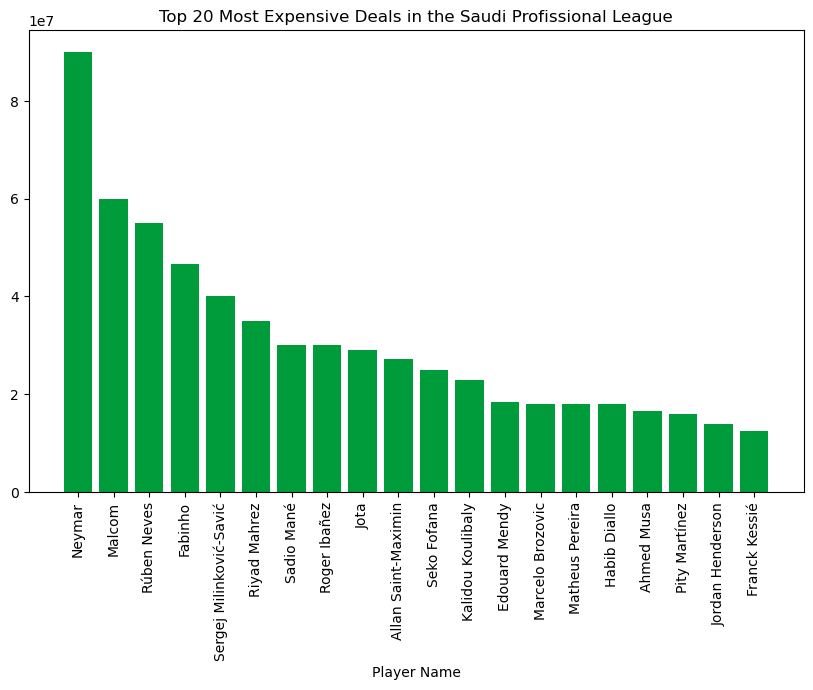

In [14]:
# Visualize the top 20 most expinsive deals


# Define the RGB values for the green color in the Saudi Arabian flag
green_color = (0/255, 155/255, 58/255)

plt.figure(figsize=(10, 6))
plt.bar(top_20_deals['player_name'], top_20_deals['fee_cleaned'], color=green_color)

plt.xlabel('Player Name')
plt.title('Top 20 Most Expensive Deals in the Saudi Profissional League')
plt.xticks(rotation=90)

plt.show()

In [31]:
# Calulate the total deal amount for each club 
club_total = spl_transfers.groupby('club_name')['fee_cleaned'].sum()

# Select the top 5 clubs
top_5_clubs = club_total.nlargest(5)

top_5_clubs

club_name
Al-Hilal SFC    453310000.0
Al-Nassr FC     246340000.0
Al-Ahli SFC     239770000.0
Ittihad Club    201900000.0
Al-Shabab FC     93910000.0
Name: fee_cleaned, dtype: float64

C:\Users\dahli\AppData\Local\Temp\ipykernel_956\1388947272.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Greens', num_slices)


TypeError: 'str' object is not callable

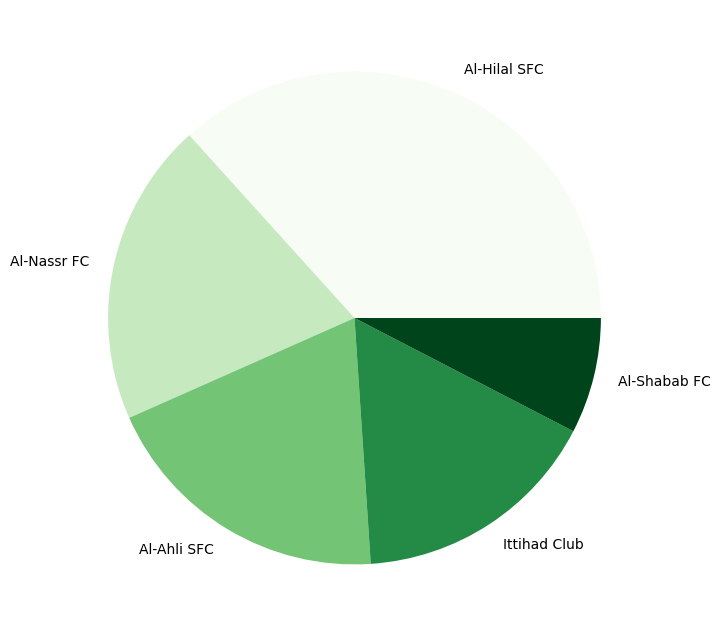

In [38]:
# Visulize the top 5 clubs

# create a pie chart
plt.figure(figsize=(8,8))
num_slices = len(top_5_clubs)
colors = plt.cm.get_cmap('Greens', num_slices)
plt.pie(top_5_clubs, labels=top_5_clubs.index, colors=colors(np.arange(num_slices)))
plt.title('Deals Distribution by Top 5 Clubs')
plt.show()

Based on the information depicted in the pie chart, it is evident that the Al-hilal club has secured the highest-valued deals, accounting for the top three deals in terms of expense.



### Combine each club with the postion and extracting the number of deals and the average deal prices for each club and position

In [15]:
# Group the data by club_name and postion, and calculate the number of deals and average deal prices
grouped_data = spl_transfers.groupby(['club_name', 'position']).agg({'fee_cleaned':['count', 'mean']})

# Flatten the column names
grouped_data.columns = ['num_deals', 'avg_deal_price']

# Reset the index to make 'club_name' and 'position' as regular columns
grouped_data = grouped_data.reset_index()

print('Number of deals and avgerage deal prices by club and position')
print(grouped_data)

Number of deals and avgerage deal prices by club and position
     club_name            position  num_deals  avg_deal_price
0    Abha Club  Attacking Midfield          0             NaN
1    Abha Club    Central Midfield          0             NaN
2    Abha Club         Centre-Back          1       1500000.0
3    Abha Club      Centre-Forward          0             NaN
4    Abha Club             Defence          0             NaN
..         ...                 ...        ...             ...
433  Ohod Club            Midfield          0             NaN
434  Ohod Club      Right Midfield          0             NaN
435  Ohod Club        Right Winger          0             NaN
436  Ohod Club          Right-Back          0             NaN
437  Ohod Club      Second Striker          0             NaN

[438 rows x 4 columns]


In [16]:
# Define the assessment criteria and corresponding symbols
assessment_criteria = [(0, 10, 'Low'), (10, 35, 'Mid')]

# Function to assign assessment values based on fee_cleaned price
def assign_transfer_rating(price):
    for lower, upper, rating in assessment_criteria:
        if lower <= price < upper:
            return rating
        return 'High'

# Create the 'transfer_rating' column by applying the assign_transfer_rating function to 'fee_cleaned'
spl_transfers['transfer_rating'] = spl_transfers['fee_cleaned'].apply(assign_transfer_rating)

spl_transfers

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,fee_cleaned,transfer_rating
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,High
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,High
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,High
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,High
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853,Al-Raed SFC,Mamadou Loum,27.0,Defensive Midfield,FC Porto,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN,High
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23.0,Centre-Forward,Al-Safa,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN,High
7855,Al-Taawoun FC,Flávio,28.0,Central Midfield,Trabzonspor,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN,High
7856,Al-Taawoun FC,Muath Faquihi,22.0,Left-Back,Al-Hilal,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN,High


In [17]:
# Define the bins and labels for the assessment categories
bins = [0, 1000000, 35000000, np.inf]
labels = ['Low', 'Mid', 'High']

# Create the 'transfer_rating' column using pandas.cut
spl_transfers['transfer_rating'] = pd.cut(spl_transfers['fee_cleaned'], bins=bins, labels=labels, right=False)

spl_transfers.head(20)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,fee_cleaned,transfer_rating
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN
5,Ittihad Club,Marzouq Al-Otaibi,24.0,Centre-Forward,Al-Shabab,€2.00m,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,2000000.0,Mid
6,Ittihad Club,Khalid Massad,28.0,Attacking Midfield,Al-Ahli,free transfer,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN
7,Ittihad Club,Ivan Malimon,21.0,Centre-Forward,Edessaikos,free transfer,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN
8,Ittihad Club,Manaf Abushgeer,20.0,Left Midfield,Ittihad C. U23,-,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN
9,Ittihad Club,Darci,31.0,Left Winger,Antalyaspor,?,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN


In [18]:
# Extract the year from 'season' column and create the 'year' column
spl_transfers['year'] = spl_transfers['season'].str[:4]

spl_transfers

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,fee_cleaned,transfer_rating,year
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN,2000
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN,2000
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN,2000
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN,2000
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,NaN,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853,Al-Raed SFC,Mamadou Loum,27.0,Defensive Midfield,FC Porto,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN,NaN,2024
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23.0,Centre-Forward,Al-Safa,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN,NaN,2024
7855,Al-Taawoun FC,Flávio,28.0,Central Midfield,Trabzonspor,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN,NaN,2024
7856,Al-Taawoun FC,Muath Faquihi,22.0,Left-Back,Al-Hilal,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,NaN,NaN,2024


In [19]:
# Calculate the total deal prices for each club
club_totals = spl_transfers.groupby('club_name')['fee_cleaned'].sum().reset_index()

# Sort the 'club_name' by the total deal price in descending order
club_total_sorted = club_totals.sort_values('fee_cleaned', ascending=False)

club_total_sorted

,club_name,fee_cleaned
11,Al-Hilal SFC,453310000.0
13,Al-Nassr FC,246340000.0
2,Al-Ahli SFC,239770000.0
27,Ittihad Club,201900000.0
19,Al-Shabab FC,93910000.0
6,Al-Ettifaq FC,47080000.0
24,Al-Wehda FC,22280000.0
21,Al-Taawoun FC,20650000.0
8,Al-Fateh SC,20520000.0
9,Al-Fayha FC,15100000.0


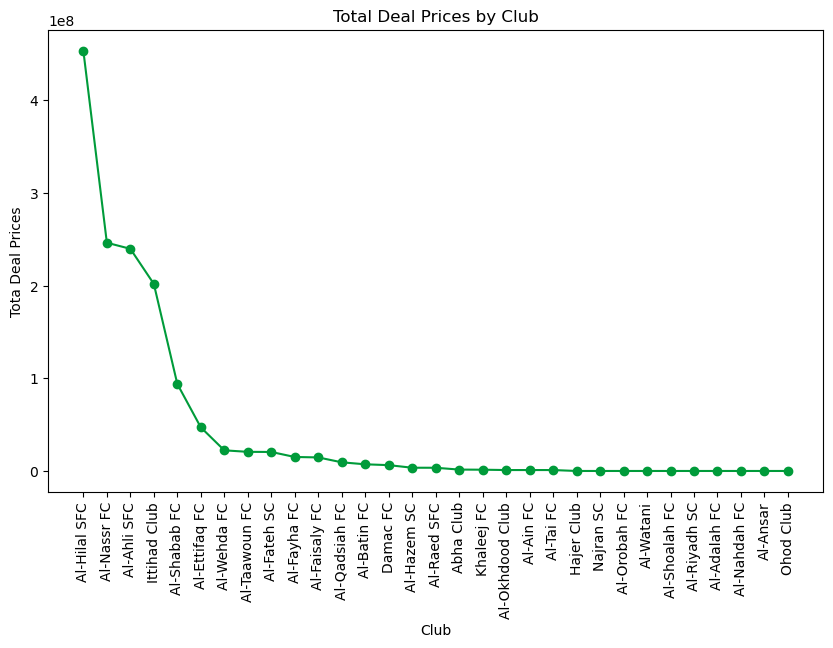

In [20]:
# Visualize the total deal prices for each club
plt.figure(figsize=(10, 6))
plt.plot(club_total_sorted['club_name'], club_total_sorted['fee_cleaned'], marker='o', color=green_color)

plt.xlabel('Club')
plt.ylabel('Tota Deal Prices')
plt.title('Total Deal Prices by Club')
plt.xticks(rotation=90)

plt.show()

From the graph, it is evident that the Al-Hilal team has secured the highest total deal prices in the Saudi Professional League, which amounts to 453,310,000 euros. There is a significant disparity between the deals of Al-Hilal and those of other clubs in terms of deal size.

## Correlation between Position and Deal prices

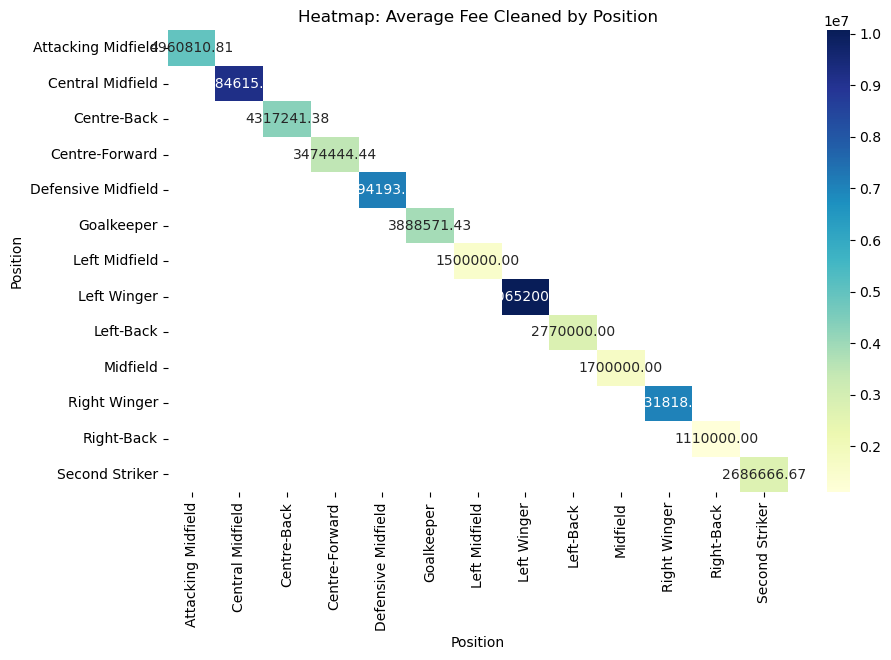

In [21]:
# Calculate the average 'fee_cleaned' for each 'postion' categorey, since 'postion' is a categorical variable, we cannot directly calculate a correlation coefficient with 'fee_cleaned'.
# Calculating the average 'fee_cleaned' for each 'postion' categorey
position_avg_fee = spl_transfers.groupby('position')['fee_cleaned'].mean().reset_index()

# Create correlation matrix between 'position' and 'fee_cleaned'
corr_matrix = pd.pivot_table(position_avg_fee, values='fee_cleaned', index='position', columns='position')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
plt.xlabel('Position')
plt.ylabel('Position')
plt.title('Heatmap: Average Fee Cleaned by Position')
plt.show()

The heatmap illustrates that the position of Attacking Midfield has the highest average deal prices.

In [22]:
corr_matrix.max()

position
Attacking Midfield    4.960811e+06
Central Midfield      9.184615e+06
Centre-Back           4.317241e+06
Centre-Forward        3.474444e+06
Defensive Midfield    7.094194e+06
Goalkeeper            3.888571e+06
Left Midfield         1.500000e+06
Left Winger           1.006520e+07
Left-Back             2.770000e+06
Midfield              1.700000e+06
Right Winger          7.031818e+06
Right-Back            1.110000e+06
Second Striker        2.686667e+06
dtype: float64

## Total of deal prices for each year 

In [23]:
#Calculate the total 'fee_cleaned' for each 'year'
yearly_total = spl_transfers.groupby('year')['fee_cleaned'].sum()


yearly_total

year
2000      4000000.0
2001            0.0
2002      1100000.0
2003      2000000.0
2004            0.0
2005     18600000.0
2006     13700000.0
2007      6140000.0
2008     16850000.0
2009     11500000.0
2010      5260000.0
2011     35030000.0
2012     31000000.0
2013     41300000.0
2014     18300000.0
2015     51260000.0
2016     19500000.0
2017     28800000.0
2018    185130000.0
2019     96950000.0
2020     76960000.0
2021     91930000.0
2022     36640000.0
2023    619230000.0
2024            0.0
Name: fee_cleaned, dtype: float64

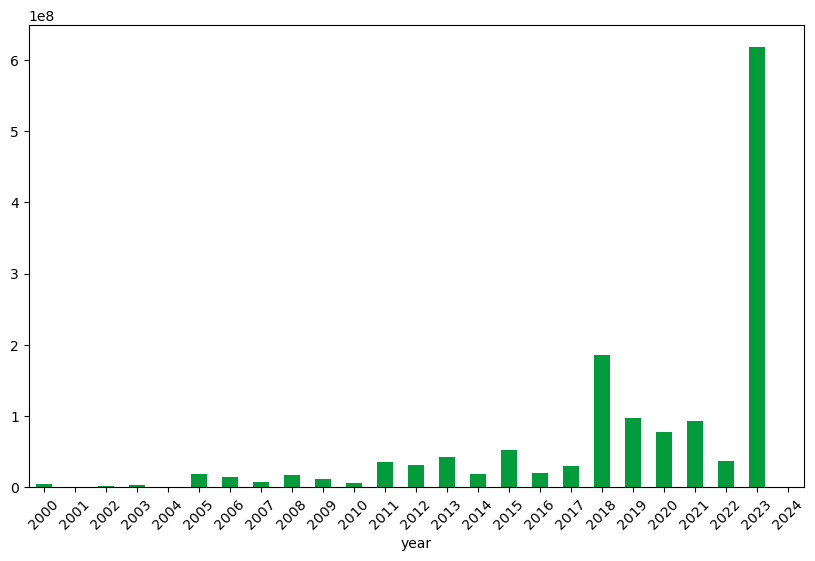

In [24]:
# Create a bar plot
plt.figure(figsize=(10,6))
yearly_total.plot(kind='bar', color=green_color)
plt.xlabel=('Year')
plt.ylabel=('Total of Deal Prices')
plt.title=('Total of Deal Prices by Year')
plt.xticks(rotation=45)
plt.show()

The bar graph highlights that the substantial player deal payments in 2023 have contributed to increased competitiveness within the SPL. As a result, the league has emerged as a formidable competitor to other prominent European leagues, such as the French, Spanish, and Italian leagues.

Thank you

Dalia Bajriy